# Apresentação:

    O objetivo deste notebook é construir o conhecimento adquirido na
    segunda parte do o curso de Deep Learning com PyTorch. Vamos aqui
    treinar nossa primeira rede neural e ver o que pode dar.

In [35]:
import torch
from torch import nn

# Forward Pass ou Feed Forward:

    Antes de começar de fato a codar, precisar entender os aspectos básicos
    sobre treinamento de uma Rede Neural. Podemos, a principio dividio o
    treinamento de uma Rede Neural em duas etapas:

**Forward  Pass:**

    A passagem direta, ou "Feed Forward", ocorre quando passamos dados de
    entrada por uma rede neural na direção direta para gerar saídas ou
    previsões. Os dados de entrada fluem através das camadas do modelo.
    Em cada camada, cálculos realizados nos dados geram representações
    intermediárias, que são passadas para cada camada subsequente até
    que a saída final seja gerada. O propósito da passagem direta é
    propagar dados de entrada pela rede e produzir previsões ou saídas
    com base nos parâmetros aprendidos do modelo (pesos e viés). Isso é
    usado tanto para treinamento quanto para gerar novas previsões. A
    saída final pode ser classificações binárias, classificações
    multi-classes ou previsões numéricas (regressões).


**Backpropagation:**

    Vamos abordar isso mais tarde no curso, mas uma passagem reversa,
    ou retropropagação, é o processo pelo qual os pesos e os viés das
    camadas são atualizados durante o treinamento. Tudo isso faz parte
    de algo chamado "loop de treinamento". Isso envolve propagar os dados
    para frente, comparar as saídas com os valores reais e, em seguida,
    propagar para trás para melhorar os pesos e os viés de cada camada
    usando alguns cálculos matemáticos úteis. Repetimos várias vezes até
    que o modelo esteja ajustado com pesos e viés significativos. Em
    resumo, durante o treinamento, a passagem reversa é o passo
    complementar à passagem direta.

## Classificação Binária

    A passagem direta, ou "forward pass", ocorre quando passamos dados de
    entrada por uma rede neural na direção direta para gerar saídas ou
    previsões. Os dados de entrada fluem através das camadas do modelo.
    Em cada camada, cálculos realizados nos dados geram representações
    intermediárias, que são passadas para cada camada subsequente até
    que a saída final seja gerada. O propósito da passagem direta é
    propagar dados de entrada pela rede e produzir previsões ou saídas
    com base nos parâmetros aprendidos do modelo (pesos e viés). Isso é
    usado tanto para treinamento quanto para gerar novas previsões. A
    saída final pode ser classificações binárias, classificações
    multi-classes ou previsões numéricas (regressões).

In [36]:
# Criando os dados de entrada com shape 5x6
input_data = torch.tensor(
    [[-.4421,1.5207,2.0607,-.3647,.4691,.0946],
     [-.9155,-.0475,-1.3645,.6336,-1.9520,-0.3398],
     [0.7406,1.6763,-.8511,.2432,.1123,-.0633],
     [-1.6630,-.0718,-.1285,.5396,.0288,-.8622],
     [-.7413,1.7920,-.0883,-.6685,.4745,-.4245]]
)

In [37]:
# Criando o modelo de classificação binária:
model = nn.Sequential(
    nn.Linear(6,4), # Primeira Camada Linear;
    nn.Linear(4,1), # Segunda Camada Linear;
    nn.Sigmoid() # Função de Ativação
)

In [38]:
# Passando os dados de entrada ao modelo:
output = model(input_data);output

tensor([[0.5569],
        [0.4055],
        [0.4928],
        [0.4475],
        [0.5265]], grad_fn=<SigmoidBackward0>)

    A saída de nossa classificação binária é uma única probabilidade
    entre zero e 1 para cada um dos nossos cinco exemplos. Lembre-se
    de que normalmente usamos um limiar de 0,5 para transformar essas
    probabilidades em rótulos de classe, como 1 (mamífero) ou zero
    (não mamífero).

In [39]:
# Classiciando o modelo:
for i,val in enumerate(output):
  if val > 0.5:
    print(f'{i+1}º Resposta é mamífero')
  else:
    print(f'{i+1}º Resposta não é mamífero')

1º Resposta é mamífero
2º Resposta não é mamífero
3º Resposta não é mamífero
4º Resposta não é mamífero
5º Resposta é mamífero


    Porém, essa nossa saída não terá muito significado até que usemos
    a retropropagação para atualizar os pesos e os viés das camadas.

## Classificação Multi-class

    Se quisermos realizar uma classificação multi-classe, o modelo
    seria em grande parte semelhante. Digamos que estejamos prevendo
    3 classes: mamífero, pássaro ou réptil. Especificamos que nosso
    modelo tem três classes, definindo esse valor como a dimensão de
    saída da última camada linear. Usamos softmax em vez de sigmoid,
    com dim igual a menos um para indicar que os cinco exemplos têm
    a mesma última dimensão que a saída da última camada linear. Vamos
    usar a mesma entrada como antes. A forma de saída é cinco por três.

In [40]:
# Especificando o numero final de classes:
n_classes = 3

In [41]:
# Criando o modelo de Classificação Multiclasses:
model = nn.Sequential(
    nn.Linear(6,4), # Primeira Camada Linear
    nn.Linear(4, n_classes), # Segunda Camada Linear
    nn.Softmax(dim=-1) # Função de ativação
)

    Note que de um modelo para o outro são mudanças bem
    sutis. Na verdade o que muda de uma modelo de classificação
    binária para um multiclasse é só um parâmetro de uma das
    camadas e a função de ativação. É uma mudança bem boba,
    bastando apenas conhecer a teoria para realiza-la adequadamente.

In [42]:
output = model(input_data)
print(output,output.shape)

tensor([[0.3631, 0.0796, 0.5573],
        [0.3369, 0.3775, 0.2856],
        [0.4235, 0.1424, 0.4342],
        [0.3076, 0.3630, 0.3294],
        [0.3538, 0.1677, 0.4785]], grad_fn=<SoftmaxBackward0>) torch.Size([5, 3])


In [43]:
# Obter os índices dos valores máximos ao longo da dimensão 1
predicted_classes = torch.argmax(output, dim=1)

# Iterar sobre os resultados e imprimir valor e índice
for i, predicted_class in enumerate(predicted_classes):
    print(f"Amostra {i + 1}: Valor máximo {output[i, predicted_class]:.2f} na classe {predicted_class.item()}")

Amostra 1: Valor máximo 0.56 na classe 2
Amostra 2: Valor máximo 0.38 na classe 1
Amostra 3: Valor máximo 0.43 na classe 2
Amostra 4: Valor máximo 0.36 na classe 1
Amostra 5: Valor máximo 0.48 na classe 2


## Regression:

    O último modelo que vamos analisar é de regressão: prever valores
    numéricos contínuos. Digamos que usemos os mesmos dados sobre cinco
    animais como antes, mas desta vez estamos prevendo os pesos dos
    animais com base em suas propriedades. Novamente, isso parece bastante
    semelhante aos modelos que vimos. No entanto, não há função de ativação
    no final, e a última dimensão da última camada linear retorna uma saída
    com uma única característica. As dimensões de saída são cinco por um:
    cinco valores contínuos, um para cada linha.

In [44]:
# Criando modelo de Regressão:
model = nn.Sequential(
    nn.Linear(6,4), # Primeira Camada Linear
    nn.Linear(4,1) # Segunda Camada Linear
)

    Olha que interessante, não tem função de ativação.

In [45]:
# Alimentando o modelo com os dados de entrada:
output_regression = model(input_data);output_regression

tensor([[ 0.0731],
        [-0.1027],
        [ 0.4385],
        [-0.3944],
        [-0.0549]], grad_fn=<AddmmBackward0>)

# Usando funções de perda para avaliar as previsões do modelo

    Já falamos da primeira etapa do treinamento de uma rede neural que
    é a etapa o foward pass que nada mais é dos calculos que uma rede
    faz do input até o output. Agora falaremos como metrificar, avaliar
    os outputs desse modelo.

    
    Faremos isso usando uma função de perda. A função de perda nos diz
    quão bom nosso modelo é em fazer previsões durante o treinamento.
    Ele pega uma previsão do modelo, y-hat, e um rótulo verdadeiro,
    ou verdade fundamental, y, como entradas e gera um float.

**One-hot encoding concepts**

    A função de perda (representada como F) compara a verdadeira classe
    (y) com a previsão do modelo (yhat) e retorna um valor numérico que
    indica o quão distantes estão essas predições da verdade. Utilizando o
    exemplo de classificação de animais com três classes possíveis (0, 1 ou 2),
    podemos utilizar a função softmax (função de ativação) para gerar uma
    saída em forma de tensor com as mesmas dimensões que o número de classes.
    Podemos comparar um número inteiro (a verdadeira classe) com um tensor
    durante a avaliação do modelo. A solução proposta é o uso da codificação
    one-hot, transformando o inteiro y em um tensor binário, facilitando a
    comparação durante a avaliação do desempenho do modelo. Deste modo, temos:

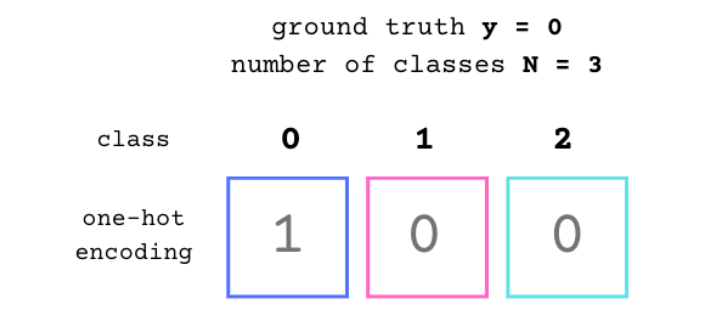

In [46]:
# Importando Numpy:
import numpy as np

In [47]:
# Representando esse one-hot-encoder:
one_hot_encoder = np.array([1,0,0]);one_hot_encoder

array([1, 0, 0])

## Transforming labels with one-hot encoding:

    O Pytorch tem um método de para nos auxiliar a transformar labels em
    one-hot-encoding.


In [48]:
# Importando API do Pytorch:
from torch.nn import functional as F

In [49]:
# Transformando labels:
print(F.one_hot(torch.tensor(0), num_classes=3))
print(F.one_hot(torch.tensor(1), num_classes=3))
print(F.one_hot(torch.tensor(2), num_classes=3))

tensor([1, 0, 0])
tensor([0, 1, 0])
tensor([0, 0, 1])


    A medida que mudarmos y por seu indice, mudaremos a estrutura do
    one-hot-encoder, como podemos ver.

## Cross entropy loss no PyTorch:

    Agora que aprendemos como realizar a codificação one-hot no PyTorch,
    podemos passar isso, juntamente com nossas previsões de saída yhat,
    para uma função de perda. yhat é armazenado como o tensor "scores".

    Apresento a você nossa primeira função de perda: a perda de entropia
    cruzada. Esta é a função de perda mais utilizada para problemas de
    classificação.

In [50]:
# Importando a função de perda:
from torch.nn import CrossEntropyLoss

In [51]:
# Definindo a pontuação:
scores = torch.tensor([[-.1211,.1059]])

# Definindo as classes:
one_hot_target = torch.tensor([[1,0]])

In [52]:
# Instanciando objeto:
criterion = CrossEntropyLoss()

# Rodando Perda:
perda = criterion(scores.double(), one_hot_target.double());perda

tensor(0.8131, dtype=torch.float64)

In [53]:
print(f'Ou seja, o nosso valor de perda é de {round(float(perda),2)*100}%')

Ou seja, o nosso valor de perda é de 81.0%


    O PyTorch fornece a útil função CrossEntropyLoss() mostrada.
    Começamos definindo nossa função de perda como "criterion".
    Em seguida, a passamos pelo método .double() do tensor scores
    e pelo tensor one_hot_target. Isso converte os tensores para um
    tipo de dado float específico aceito pela função CrossEntropyLoss().
    O resultado apresentado é o valor da perda.

**Resumindo:**

    A função de perda recebe como entrada o tensor de pontuações (scores),
    que é a predição do modelo ANTES da função softmax final, e a classe
    de verdade codificada one-hot. Ela produz como saída um único número
    decimal, que representa a perda daquela amostra. Lembre-se de que o
    objetivo do treinamento é minimizar essa perda. Vamos aprender sobre
    como minimizar a perda no próximo tópico.

# Backpropagation (Retropropagação ou, para os intimos, Regra da Cadeia):

    Vamos discutir o cálculo de derivativos, uma etapa fundamental
    para minimizar perdas. Sabemos que um modelo prevê erroneamente
    quando a perda é alta e prevê corretamente quando a perda é baixa.




**Gradiente**

    Um conceito fundamental para entender o backpropagation, é o conceito
    de gradiente. O gradiente (ou vetor gradiente se você for olhar no livro
    do Stewart) é um vetor que representa a taxa de variação mais acentuada
    de uma função escalar em um determinado ponto. Ele aponta na direção em
    que a função cresce mais rapidamente.
  
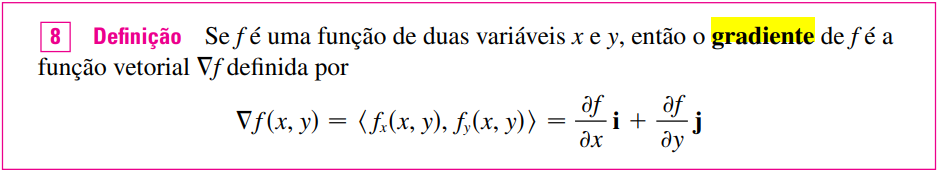

**Gradiente Descendente**

    Dito isso, podemos definir o que é o Gradiente Descendente. O Gradiente
    Descendente é um algoritmo de otimização usado para encontrar o mínimo
    local (ou global) de uma função diferenciável. A ideia básica é usar a
    informação fornecida pelo gradiente da função em um determinado ponto
    para iterativamente ajustar os parâmetros do modelo ou variáveis de
    entrada, movendo-se na direção oposta ao gradiente. Ou seja, o algorítmo
    do Gradiente Descentende é uma forma de minimizar a função objetivo.

    Eu fiz questão de fazer essa explicação, porque mim sempre entender
    isso foi confuso, mas o Gradiente é uma coisa, o Gradiente Descendente
    é outra. Você usa a ideia matemática do Gradiente no algorítimo de
    otimização Gradiente Descendente.




**Retropropagação**

    Backpropagation para ajustar os pesos da rede de maneira a minimizar a
    função de perda ou custo associada à tarefa em questão. A ideia central
    é aplicar o Gradiente Descendente para otimizar os pesos da rede neural.

    O processo de completo de treinamento de uma rede neural envolve duas
    fases principais: a fase de propagação para frente (forward pass) e a
    fase de retropropagação (backward pass).

1. Utilização do Gradiente Descendente:

    O Gradiente Descendente é um algoritmo de otimização usado para encontrar
    os mínimos locais ou globais de uma função. No contexto do treinamento de
    redes neurais, a função que estamos tentando minimizar é a função de perda,
    que mede a diferença entre as saídas previstas pela rede e os rótulos
    reais. O Gradiente Descendente é utilizado para ajustar os pesos da rede
    de forma a reduzir gradualmente o valor dessa função de perda.

2. Backpropagation como Método para Calcular o Gradiente:

    Backpropagation é o método pelo qual os gradientes da função de perda
    em relação aos pesos da rede são calculados. Ele utiliza a técnica da
    cadeia do cálculo (regra da cadeia) para propagar os gradientes da camada
    de saída para as camadas de entrada. Em outras palavras, durante a fase de
    retropropagação, os gradientes são calculados para cada camada da rede,
    indicando quanto a função de perda seria alterada se os pesos de cada
    camada fossem ajustados.

3. Atualização dos Pesos:

    Após calcular os gradientes usando o backpropagation, o Gradiente
    Descendente é aplicado para atualizar os pesos da rede. A ideia é
    ajustar os pesos na direção oposta ao gradiente, buscando minimizar
    a função de perda. A taxa de aprendizado controla o tamanho dos passos
    que são dados durante esse processo.

    Em resumo, o Gradiente Descendente é a abordagem geral de otimização
    utilizada para minimizar a função de perda, enquanto o backpropagation
    é o método específico pelo qual os gradientes necessários para o Gradiente Descendente são calculados. Como se calcula gradiente? Derivando. Como
    se deriva uma função composta, que é o nosso caso? Regra da Cadeia:

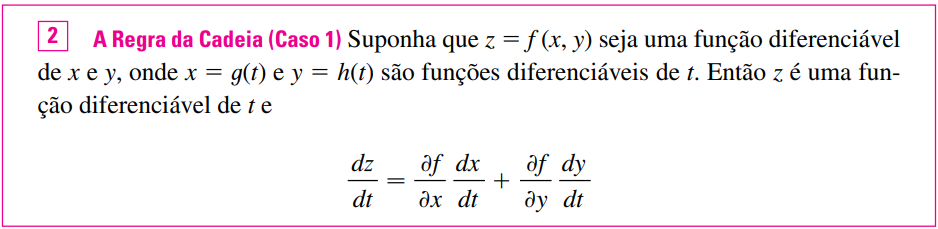    

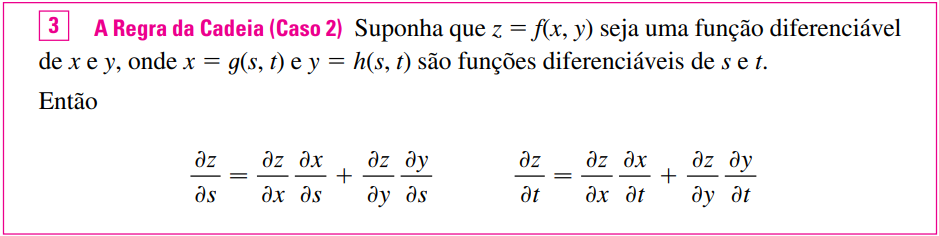

    Isso explica porque backpropagation, para os intimos, nada mais é
    do que Regra da Cadeia. No final das contas, não é um processo tão
    complexo assim, basta entender um pouco da teoria.

**Backpropagation no PyTorch**

    Felizmente, o PyTorch cuida diretamente da retropropagação. Depois de
    executar uma Forward Pass nos dados de amostra, definimos uma função
    de perda, aqui CrossEntropyLoss(), e a usamos para comparar as previsões
    com os valores alvo. Usamos .backward() para calcular gradientes usando
    esta perda definida. Isso preenche os atributos .grad dos pesos e
    tendências de cada camada. Cada camada do modelo pode ser indexada
    separadamente, começando com um índice zero. Cada camada tem um peso,
    uma tendência e os gradientes correspondentes.

In [54]:
print(input_data, input_data.shape)

tensor([[-0.4421,  1.5207,  2.0607, -0.3647,  0.4691,  0.0946],
        [-0.9155, -0.0475, -1.3645,  0.6336, -1.9520, -0.3398],
        [ 0.7406,  1.6763, -0.8511,  0.2432,  0.1123, -0.0633],
        [-1.6630, -0.0718, -0.1285,  0.5396,  0.0288, -0.8622],
        [-0.7413,  1.7920, -0.0883, -0.6685,  0.4745, -0.4245]]) torch.Size([5, 6])


In [55]:
# Criando o modelo e rodando o Forward Pass:
model = nn.Sequential(
    nn.Linear(6,8),
    nn.Linear(8,4),
    nn.Linear(4,2)
)

prediction = model(input_data)

In [56]:
# Criando vetor de Target para o nosso exercicio:
from random import randint as rand

target = torch.tensor([rand(0,1) for i in range(input_data.shape[0])]);target

tensor([0, 1, 1, 1, 1])

In [57]:
# Instanciando a função perda:
criterion = CrossEntropyLoss()

# Criando a função Loss:
loss = criterion(prediction, target)

# Calculando a  função perda e computando os gradientes:
loss.backward()

In [58]:
# Acessando cada camada do gradiente:
n_camadas = 3 # Numero de Camadas do Modelo
for i in range(n_camadas):
  print(model[i].weight.grad, model[i].bias.grad,'\n')

tensor([[ 0.0611, -0.0656,  0.0887, -0.0205,  0.0344,  0.0454],
        [-0.0594,  0.0638, -0.0862,  0.0200, -0.0334, -0.0441],
        [-0.0077,  0.0083, -0.0113,  0.0026, -0.0044, -0.0058],
        [ 0.0837, -0.0899,  0.1215, -0.0282,  0.0472,  0.0622],
        [-0.0370,  0.0397, -0.0537,  0.0125, -0.0208, -0.0275],
        [-0.1099,  0.1181, -0.1596,  0.0370, -0.0619, -0.0817],
        [ 0.0105, -0.0112,  0.0152, -0.0035,  0.0059,  0.0078],
        [ 0.0779, -0.0836,  0.1131, -0.0262,  0.0439,  0.0579]]) tensor([-0.0862,  0.0838,  0.0109, -0.1182,  0.0523,  0.1553, -0.0148, -0.1100]) 

tensor([[-0.0148, -0.0060,  0.0538,  0.0957, -0.0109,  0.1333,  0.0969,  0.0408],
        [-0.0025, -0.0010,  0.0090,  0.0160, -0.0018,  0.0223,  0.0162,  0.0068],
        [ 0.0426,  0.0174, -0.1549, -0.2754,  0.0312, -0.3837, -0.2787, -0.1175],
        [-0.0019, -0.0008,  0.0071,  0.0126, -0.0014,  0.0175,  0.0127,  0.0054]]) tensor([ 0.1253,  0.0210, -0.3606,  0.0165]) 

tensor([[-0.0052,  0.1140,  

**Atualizando parâmetros do modelo**

    Para atualizar os parâmetros do modelo manualmente,
    acessamos cada gradiente de camada, multiplicamos pela
    taxa de aprendizado e subtraímos esse produto do peso.
    Aprenderemos mais sobre a taxa de aprendizagem posteriormente,
    que é um parâmetro ajustável usado no treinamento.

In [59]:
# Taxa de Aprendizado:
lr = 0.001

    A taxa de aprendizado é geralmente pequena, podemos
    entende-la como o tamanho do passo que do algorítmo
    do Gradiente Descendente. Se for muito grande, pode
    ser que não encontremos o minimo local/global.

In [60]:
# Atualizando os pesos:
for i in range(n_camadas):
  weight = model[i].weight
  weight_grad = model[i].weight.grad
  weight = weight - lr * weight_grad

In [61]:
# Atualizando viés:
for i in range(n_camadas):
  bias = model[i].bias
  bias_grad = model[i].bias.grad
  bias = bias - lr * bias_grad

**Funções convexas e não convexas**

    Antes de aprendermos as funções do PyTorch que podem atualizar
    automaticamente os parâmetros do modelo para nós, vamos dar um
    passo atrás. Algumas funções, como a da esquerda, possuem um mínimo
    e apenas uma, chamada de mínimo “global”. Essas funções são "convexas".

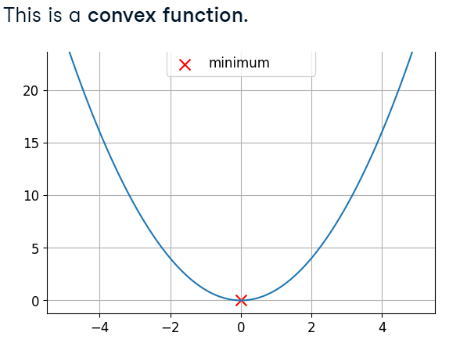

    Algumas funções "não convexas" têm mais de um mínimo "local".

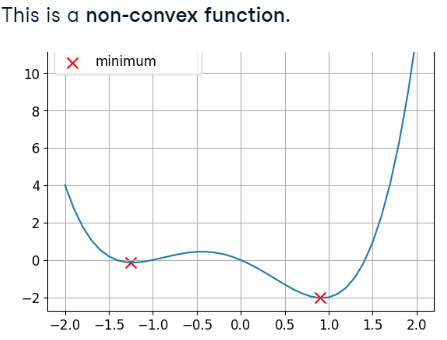

    Num mínimo local, o valor da função é mais baixo comparado com pontos
    próximos, mas pontos mais distantes podem ser ainda mais baixos.
    Ao minimizar funções de perda, nosso objetivo é encontrar o mínimo
    global da função não convexa, aqui, quando x é aproximadamente um.

**Gradiente descendente**

    As funções de perda usadas no aprendizado profundo não são convexas!
    Mas mesmo assim, utilizamos o algorítmo de Gradiente Descendente para
    encontrar os mínimos globais de funções não convexas no contexto de
    redes neurais. Isso acontece porque conseguimos utilizar a probabilidade
    a nosso favor, ou seja, são tantas features para otimizar, o gradiente
    é tão "raro" de ser encontrado, que quando encontrato, muito provavelmente
    é o global, ou o melhor que podemos encontrar. É uma das máginas matemáticas
    da área, não tem muito o que se teorizar sobre não. A probabilidade está
    a nosso favor, por sorte o Gradiente Descendente funciona para esse caso.
    Para quem não sabe, funções não convexas, tipicamente não se usa o
    algorítmo de gradientes descendentes, justamente pelo fato do gradiente
    poder não ser global.

    O PyTorch faz isso para nós usando "otimizadores". O otimizador mais
    comum é a descida gradiente estocástica (SGD). Usamos optim para
    instanciar SGD conforme mostrado. .parameters() retorna um iterável
    de todos os parâmetros do modelo, que passamos para o otimizador.
    Usamos uma taxa de aprendizado padrão, "lr", aqui, mas isso é ajustável.
    O otimizador calcula gradientes para nós e atualiza os parâmetros do
    modelo automaticamente, chamando .step(). Magia!


In [62]:
# Importando Optimizer:
from torch import optim

In [63]:
# Instanciando o optimizador:
optimizer = optim.SGD(model.parameters(), lr=lr);optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [64]:
# Calculando os gradientes com optimizer:
optimizer.step()

# Escrevendo nosso primeiro ciclo de treinamento

In [69]:
from torch.utils.data import TensorDataset,DataLoader,Dataset
from random import randint as rand

In [98]:
rand(0,10)

3

In [127]:
targets = torch.tensor([rand(0,100)/rand(1,100) for i in range(5)]);targets.shape

torch.Size([5])

Note:

In [130]:
print(f'{input_data.dtype} \\ {target.dtype}')

torch.float32 \ torch.int64


ou seja, os nossos dados estão em tipos de **precisão** diferentes. Isso pode parecer bobeira, mas quebra o código se não tiver cuidado. Porque tipos de **precisão** diferente para **pontos flutuantes** requerem quantidade de memória diferentes para o armazenamento. Quando rodarmos o loop de treinamento, isso dá problema na hora de computar os erros.

In [145]:
input_data=input_data.float();input_data.dtype # Passando o input para float

torch.float32

In [146]:
# Criando o dataset e carregando  dos dados:
dataset = TensorDataset(torch.tensor(input_data).float(),torch.tensor(target).float())
dataloader = DataLoader(dataset, batch_size=4,shuffle=True)

<ipython-input-146-307bd7c2c40f>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(input_data).float(),torch.tensor(target).float())


A função `TensorDataset` está sendo utilizada aqui apenas para organizar os dados e target como `float`.

A função `DataLoader` permite criar "*lotes*" de dados, que são passados através do modelo em cada passagem para frente (forward pass), ou para trás (backward pass).

In [147]:
# Instanciando Modelo:
model = nn.Sequential(
    nn.Linear(input_data.shape[1], 4), # Primeira camada oculta
    nn.Linear(4, 1)   # Output size
)

Note que tudo aqui não passa de multiplicação de matrizes e, para que a multiplicação esteja definida, sabemos que $\small \textbf{A}_{n\times p}*\textbf{B}_{p\times s} = \textbf{C}_{n\times s}$. Ou seja, para que o produto interno esteja bem definido, o número de colunas da primeira, precisa ser igual ao número de linhas da segunda.

In [148]:
# Olhando para o shape da nossos dados de entrada:
print(f'Temos {input_data.shape[1]} colunas, ou seja, precisamos que a primeira camada linear também tenha {input_data.shape[1]} para realizar a multiplicação de matrizes.')

Temos 6 colunas, ou seja, precisamos que a primeira camada linear também tenha 6 para realizar a multiplicação de matrizes.


In [149]:
# Instanciando função perda e optimizador:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

In [150]:
from tqdm import trange

In [155]:
num_epochs = 500

# Loop de treinamento:
for epoch in trange(num_epochs):
  for data in dataloader:
    # Setando apra não guardar os gradientes:
    optimizer.zero_grad()

    # feature e target
    feature, target = data

    # feed forward:
    pred = model(feature)

    # Computando os erros:
    loss = criterion(pred,target)
    loss.backward()

    # Atualizando os parâmetros:
    optimizer.step()

  0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 500/500 [00:00<00:00, 605.50it/s]


In [156]:
loss

tensor(0.0085, grad_fn=<MseLossBackward0>)